# Title: Toxic Span Prediction using BERT models

#### Members' Names or Individual's Name: Farzeem Jiwani, Agha Ahmad

####  Emails: farzeem.jiwani@ryerson.ca, agha.ahmad@ryerson.ca

# Introduction

#### Problem Description:

Toxicity is pervasive in social media and poses a major threat to the health of online communities. With the ever-increasing availability of digital information, toxic content is also on the rise. Therefore, the detection of this type of language is of paramount importance.

This report focuses on the evaluation of systems that can accurately identify toxic spans within the text. Highlighting such spans can provide more information to human moderators in the form of attribution, instead of an unexplained toxicity score per post, and is thus a crucial step towards successful semi-automated moderation. 


#### Context of the Problem:
Moderation is crucial to promoting healthy online discussions. The anonymity afforded by computer-mediated communication enables individuals to engage in toxic behavior which they would otherwise not consider. A toxic span is defined as a sequence of words that
contributes to a text’s toxicity.

The user-generated digital content is increasing rapidly every second of the day. This can include some toxic language whose detection can be difficult due to the complexities of human languages. 

#### Limitation About other Approaches:

Although many datasets and models focusing on toxicity detection have been
released, most of them classify entire sequences of text, and do not highlight the individual words that make a text toxic. In many cases, the data, which are considered to be toxic, contain words that have not been written in their standard forms. There might also be a lot of misspelling or letter replacements. In addition, usually, the words that are considered to be the most offensive are bleeped which makes them difficult to be recognized if we use a model which learns the content representation based on the words. Apart from word-related issues, the context also plays a crucial role in the meaning that a word conveys since words in different contexts can have various meanings. Prior approaches do not provide such domain-specific information to the model which results in the system not being able to learn the context level toxicity of the text.

#### Solution:
This report tests the following hypotheses:

**Hypothesis 1** Count-based information can aid pre-trained models in token classification tasks.

**Hypothesis 2** Pre-trained models are unlikely to capture domain-specific information. Such information is likely to improve their performance in token classification tasks.

**Hypothesis 3** Adding a CRF, which affords a sentence-level predictive scope, will improve pre-trained model performance in token classification tasks.


# Background

Primary Paper related work:

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Wah Meng Lim and Harish Tayyar Madabushi. [1] | Improves the performance of pre-trained models in sequence classification tasks using task-specific knowledge using Bert + TF-IDF | OffensEval-2020 | Good performance on Offense Eval Task but misses on toxicity contextual information for this task
| Anushka Prakash and Harish Tayyar Madabushi [2] |  Incorporating Count-Based Features into Pre-Trained Models for Improved Stance Detection using RoBERTa + TF-IDF | RumourEval-2019 | Improved performance against the base RoBERTa model but does not capture toxicity for this task
| David Noever [3] | Evaluated the relative predictive value of 28 features of syntax, sentiment, emotion, and outlier word dictionaries for online toxicity detection | OffensEval-2020 | Found the most predictive feature of offensive commentary was shown to be a simple bad word list, no weakness
| Souza et al. [4] | Proposed a BERT-CRF model and directly compares the performance of a base BERT model against a BERT-CRF model | - | -
| Erik Yan and Harish Tayyar Madabushi [5] | Proposed DistilBERT + 4 hypotheses for toxic span detection | SemEval-2021 | Further explore how the TF-IDF, WordList,CRF and other similar features interact with pre-trained models in the task of token classification but unable to improve performance radically.  
| Akbar Karimi, Leonardo Rossi and Andrea Prati [6] | Proposed CharacterBERT for toxic span detection | SemEval-2021 | Explores how CharacterBERT and CharacterBERT+BoW can predict toxic spans showing improvement over baseline but not that much.

# Methodology

## Primary Paper

### Approaches

The paper uses DistilBERT [5] as a baseline measure of performance. It present four models in addition to the baseline DistilBERT model:
1. DistilBERT+TF-IDF 
2. DistilBERT+Word List 
3. DistilBERT+TF-IDF+Word List 
4. DistilBERT+CRF

The training process was performed five times, using a different random seed each time. This is because varying the random seed used in fine-tuning BERT models can yield substantially different results, even if the models are the same and identical hyperparameters are used [7].

**DistilBERT+TF-IDF:**

TF-IDF is a count-based statistical measure that captures corpus-level information, accounting for global correlations and associations between words. Use of TF-IDF captures word importance, enabling the identification of key words. This word importance could contribute to the identification of a text’s toxicity, as shown by [1][2]


**DistilBERT+Word List:**

One of the most straightforward approaches for toxicity detection is to use a word list, whereby the toxicity of a sequence is determined by comparing the words it contains against a list of known toxic words. Such domain-specific information has been shown to be effective for toxicity detection [3].


**DistilBERT+TF-IDF+Word List:**

Incorporated the TF-IDF and word list features by modifying the DistilBERT model. First, we removed the token classification layer on top of the baseline DistilBERT model. Then, for the TF-IDF feature, we appended each token’s TF-IDF weight to its hidden state output vector. For the word list feature, we appended a value of 0 or 1. A value of 1 was used if the token appeared in the word list, whilst a value of 0 was used if it did not. Finally, these vectors were then pushed through a fully connected layer for classification.


**DistilBERT+CRF:**

Followed the more successful fine-tuning approach used by [4], which uses a linear classification layer and updates all weights, including BERT’s, during training. The CRF takes the output scores from the classification layer as input and computes the loglikelihood of the given sequence of tags. The model was trained to maximise the log-likelihood of the correct tag sequence.

## Secondary Paper

### System Description

This system consists of four main stages namely, pre-processing, applying CharacterBERT, applying Bag-of-Words model, and finally combining the results of the two models. We describe each of these stages in the following subsections.

#### Pre-Processing

We approach the task of toxic spans detection as a sequence labelling task where each word of the input row is classified into one of the predefined
classes. 
We define three classes of **{B, I, O}**, meaning that each word can be the **first word (B)** of a set of continuous toxic words, **in between (I)**, or **not toxic (O)**. Therefore, in order for both of our models to be able to process these inputs, we first need to break the rows into words and label them as one of the above-mentioned classes. This was carried out by simply splitting each input row at the space characters. Then, after creating a dataset that has been labeled on the word level, we can use it as the input of our models. The same is done for the Bag-of-Words model with a difference in treating the bleeped words 

#### BERT vs CharacterBERT

**BERT** use a subword tokenization system which relies on a predefined set of wordpieces, supposedly striking a good balance between the flexibility of characters and the efficiency of full words.

**CharacterBERT**, CharacterBERT model is almost identical to the well-known BERT model with a difference in initial embedding. In the general BERT model, words are broken into pieces and the embeddings for these word pieces are computed. In CharacterBERT, however, words are divided into letters or characters. Then, using CNN modules the embeddings are computed on the character level.

This makes the network extract features on the lowest level, making it suitable for contexts which contain many unseen vocabulary terms such as misspelled words or technical jargon. After the initial character-aware CNN layer, there is the BERTbase architecture which contains 12 layers (blocks) of Transformer with the hidden size of 768 and 12 attention heads. The final layer representations are converted into logits using a fully connected layer after which a Softmax layer is applied to extract the token’s (word’s) class.

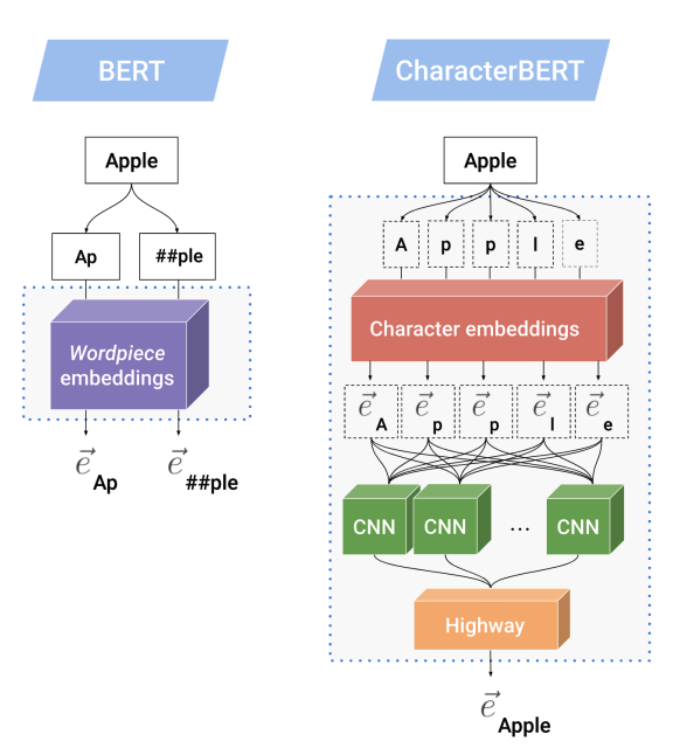



Comparison of the context-independent representation systems in BERT and CharacterBERT. In this illustration, BERT splits the word “Apple” into two wordpieces then embeds each unit separately. CharacterBERT produces a single embedding for “Apple” by consulting its sequence of characters.

#### Bag of Words

**Bag-of-Words Model**: In this model, by examining the training set, we first build a dictionary of toxic words with their frequency. Then, we locate the words from the toxic dictionary in each sentence of the test set. If the word is found and its frequency as well as its toxicity ratio in the training set are higher than certain values, it is labeled as toxic. 



This ratio which we call toxicity ratio (defined below) along with the term frequency are the only parameters of the Bag-of-Words model.

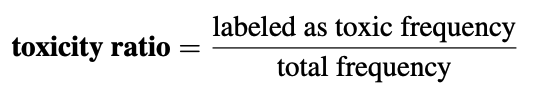

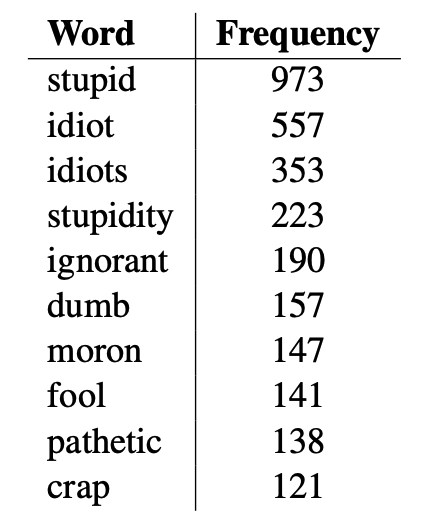

Top 10 toxic words in the training set.

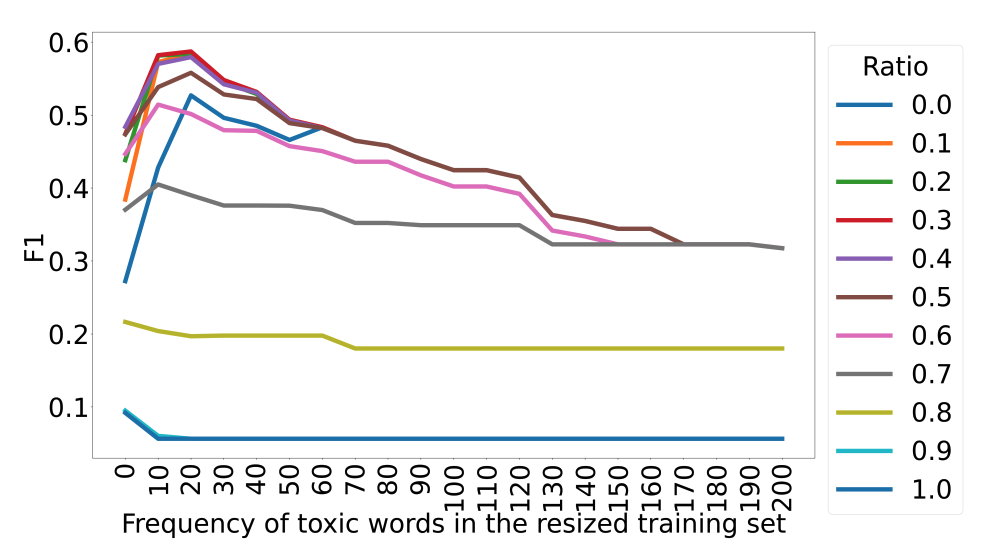

#### CharacterBERT + BoW

In order to get the improved version of the toxic language labeling, the union of the spans detected by
the bag-of-words model and that of CharacterBERT
is taken. The results will improve if there are words
labeled correctly with the Bag-of-Words model that
are not in the output for CharacterBERT. This can
be achieved by specifying a high toxicity ratio for
a word to be labeled as toxic. Also, the wrongly
labeled tokens should not be too many since it can
have a negative effect on the F1 score. Therefore,
the frequency with which a toxic word appears
should be somewhat high. Striking a balance between these two parameters can help improve the
output of CharacterBERT.


# Implementation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!cd '/content/drive/MyDrive/DS8008_Paper/toxic_span_detection'

/content/drive/MyDrive/DS8008 Paper/toxic_span_detection


## Install libraries provided in requirements.txt

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 3.5 MB 15.5 MB/s 
     |████████████████████████████████| 596 kB 64.6 MB/s 
     |████████████████████████████████| 895 kB 61.5 MB/s 
     |████████████████████████████████| 6.8 MB 56.0 MB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=7a2d55b43f7ebcf652c6fb0f81cba3bb87e82346f2f305d8dd637c360e0ca912
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Training

In [ ]:
!python src/run_ner.py data/tsd_train.csv --do_train --model_output_dir models/sample_model/

Downloading: 100% 28.0/28.0 [00:00<00:00, 31.8kB/s]
Downloading: 100% 226k/226k [00:00<00:00, 924kB/s]
Downloading: 100% 455k/455k [00:00<00:00, 1.47MB/s]
Downloading: 100% 483/483 [00:00<00:00, 606kB/s]
Downloading: 100% 256M/256M [00:04<00:00, 61.6MB/s]
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TSDModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TSDModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TSDModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TSDModel were not 

## Evaluation

In [ ]:
!python src/run_ner.py data/tsd_trial.csv --do_eval --model_name_or_path models/sample_model/ --result_output_dir results/sample_model/

***** Running Evaluation *****
  Num examples = 690
  Batch size = 32
100% 22/22 [00:08<00:00,  2.67it/s]


## Testing

In [ ]:
!python src/run_ner.py data/tsd_test.csv --do_test --model_name_or_path models/sample_model/ --result_output_dir results/sample_model/

***** Running Prediction *****
  Num examples = 2000
  Batch size = 32
100% 63/63 [00:17<00:00,  4.19it/s]/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100% 63/63 [00:40<00:00,  1.55it/s]


## Test Output Example

Once the above steps are completed, you will see a **model** and a **results** folder created. 

To view the model architecture see the */content/drive/MyDrive/DS8008_Paper/toxic_span_detection/models/sample_model/config.json* file.

For understanding the output, pick any text from */content/drive/MyDrive/DS8008_Paper/toxic_span_detection/data/tsd_test.csv* and a corresponding prediction span from */content/drive/MyDrive/DS8008_Paper/toxic_span_detection/results/sample_model/spans-pred.txt*. An example is shown below for reference.

In [13]:
s = ' That''s right. They are not normal. And I am starting from the premise that they are ABNORMAL. Proceed wth the typical racist, bigot, sexist rubbish. Thanks!'
pred = [118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146]
toxic = ''
for i,c in enumerate(s):
  if i in pred:
    toxic += c

print(toxic)

racistbigotsexistrubbish


# Results

## Primary paper

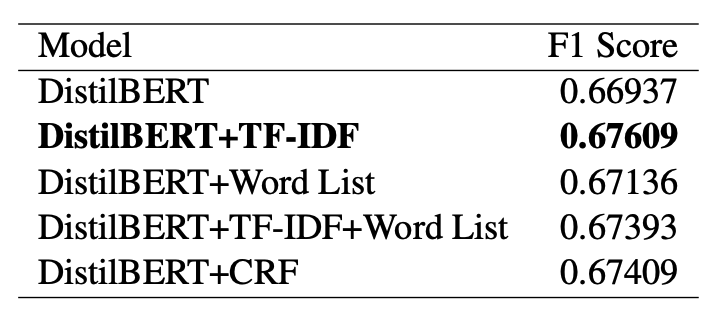

F1 score achieved by each model, tested against the test dataset.

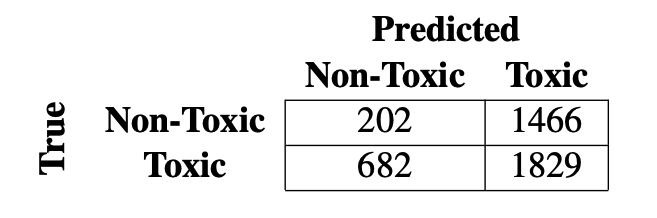


Confusion matrix of the DistilBERT model on a subset of the test dataset from which the tokens correctly predicted by both the DistilBERT and DistilBERT+TF-IDF models to be non-toxic have been removed.

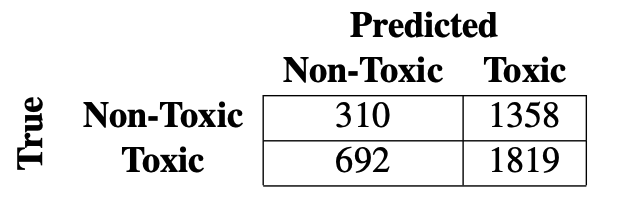

Confusion matrix of the DistilBERT+TF-IDF model on a subset of the test dataset from which the tokens correctly predicted by both the DistilBERT and DistilBERT+TF-IDF models to be non-toxic have been removed.

## Secondary paper


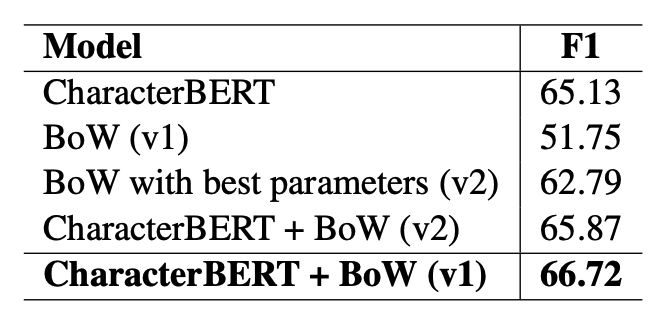


Comparing results of the proposed models.
The boldfaced one is the submitted version. BoW: Bagof-Words model.

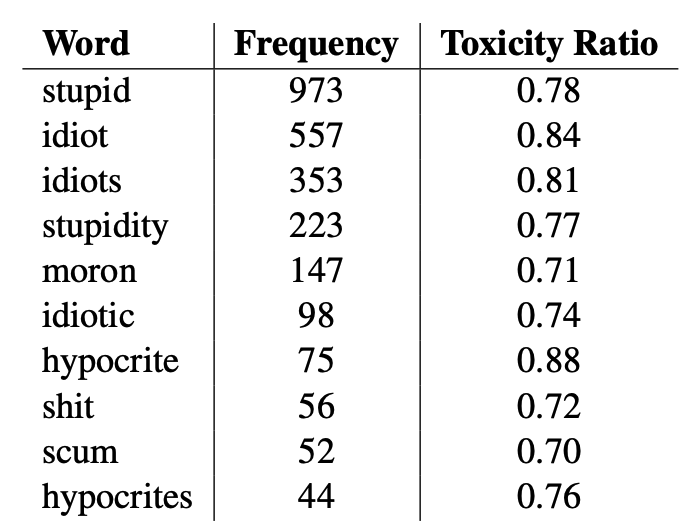


Words selected as the toxic words with minimum frequency of 40 and minimum toxicity ratio of 0.7 (BoW (v1))

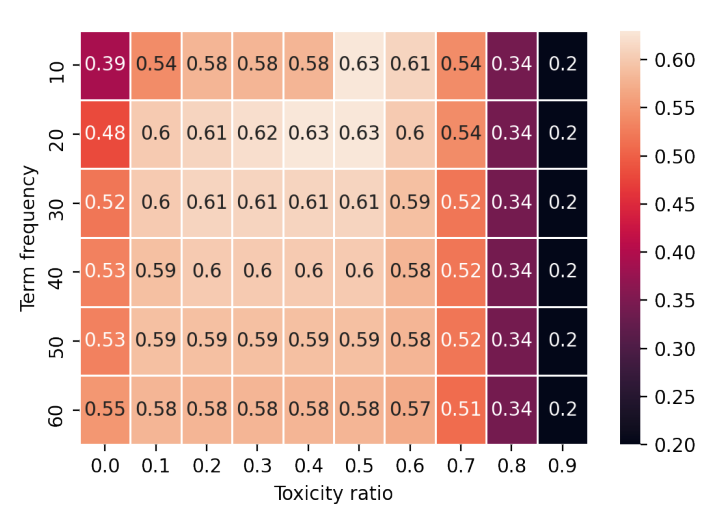


Heatmap of the results (F1 scores) with different values of term frequency and toxicity ratio before combining with CharacterBERT

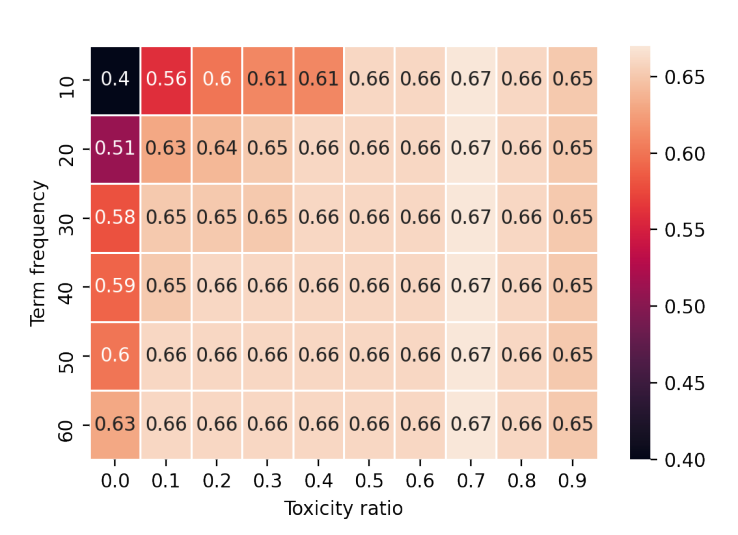


Heatmap of the results (F1 scores) with different values of term frequency and toxicity ratio after combining with CharacterBERT

# Conclusion and Future Direction

## Primary Paper

This work explored the possibility of improving pre-trained model performance on the token classification task of toxic span detection. As discussed
that adding 1) countbased information, 2) domain-specific knowledge, and 3) a CRF can aid pre-trained models in token classification tasks. Whilst the experimental results seem to suggest that all three of these features improve the performance of DistilBERT, they do so only marginally. Further analysis, however, showed that, whilst the overall F1 improvement from adding TF-IDF
was small, the addition of a count-based feature helped to reduce DistilBERT’s overprediction of toxic tokens.

## Secondary Paper

In the approach, they first first fine-tune CharacterBERT, a character-level pre-trained language model, on the toxic training data. Then using a simple bag-of-words model, further improve the results of this system. The Bag-of-Words model labels the words based on their frequency and the ratio of toxicity in the training data. The results showed that this model, although extremely simple, gives a close performance to that of CharacterBERT with millions of parameters.

## Our Learnings and Proposed Improvements

The results illustrated that techniques such as TF-IDF and BoW had a great improvement over the baseline BERT models since they were helping in reducing the overfitting/ overprediction of the toxic spans. We learnt that in any text classification task, whilst pretrained models work well but it is critical to understand how using it can be modified/ tuned to perform well on the respective given task.

On another hand, we also thought that the toxic span label can be looked at as another NER label. Final set of labels could be defined as toxic, non-toxic and padding which is later on given to the CRF layer for this NER task. Also, we looked at [SpanBERT](https://arxiv.org/abs/1907.10529) as a potential pretrained model that is designed to better represent and predict spans of text.

# References

[1]:  Wah Meng Lim and Harish Tayyar Madabushi. 2020.
UoB at SemEval-2020 task 12: Boosting BERT with
corpus level information. In Proceedings of the
Fourteenth Workshop on Semantic Evaluation, pages
2216–2221, Barcelona (online). International Committee for Computational Linguistics.

[2]:  Anushka Prakash and Harish Tayyar Madabushi. 2020.
Incorporating count-based features into pre-trained
models for improved stance detection. In Proceedings of the 3rd NLP4IF Workshop on NLP for Internet Freedom: Censorship, Disinformation, and Propaganda, pages 22–32, Barcelona, Spain (Online).
International Committee on Computational Linguistics (ICCL).

[3]: David Noever. 2018. Machine learning suites for online toxicity detection

[4]: Fabio Souza, Rodrigo Nogueira, and Roberto Lotufo. 2020. Portuguese named entity recognition using
bert-crf.

[5]: Yan, E., & Madabushi, H. T. (2021). UoB at SemEval-2021 Task 5: Extending Pre-Trained Language Models to Include Task and Domain-Specific Information for Toxic Span Prediction. arXiv preprint arXiv:2110.03730.

[6]: Karimi, A., Rossi, L., & Prati, A. (2021). Uniparma at semeval-2021 task 5: Toxic spans detection using characterbert and bag-of-words model. arXiv preprint arXiv:2103.09645.